In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-03-24 03:06:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   102MB/s    in 1.4s    

2021-03-24 03:06:09 (102 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-03-24 03:06:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.08s   

2021-03-24 03:06:22 (133 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os 
import zipfile

local_zip= '/tmp/horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip= '/tmp/validation-horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
#Derictory with training horse pic
train_horse_dir= os.path.join('/tmp/horse-or-human/horses')
#derictory with training human pic
train_human_dir= os.path.join('/tmp/horse-or-human/humans')
#derictory with validation horse pic
validation_horse_dir= os.path.join('/tmp/validation-horse-or-human/horses')
#derictory with validation human pic
validation_human_dir= os.path.join('/tmp/validation-horse-or-human/humans')

In [5]:
#see file names in the derictory 
train_horse_names= os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names= os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names= os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names= os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse32-5.png', 'horse35-8.png', 'horse16-7.png', 'horse47-5.png', 'horse05-3.png', 'horse02-1.png', 'horse32-1.png', 'horse05-9.png', 'horse39-7.png', 'horse42-8.png']
['human03-07.png', 'human04-04.png', 'human05-19.png', 'human01-25.png', 'human15-26.png', 'human16-27.png', 'human15-22.png', 'human02-12.png', 'human15-28.png', 'human10-01.png']
['horse3-070.png', 'horse1-122.png', 'horse5-164.png', 'horse5-360.png', 'horse5-002.png', 'horse4-043.png', 'horse5-504.png', 'horse3-416.png', 'horse3-198.png', 'horse4-014.png']
['valhuman04-24.png', 'valhuman03-14.png', 'valhuman03-05.png', 'valhuman05-09.png', 'valhuman01-06.png', 'valhuman05-25.png', 'valhuman02-10.png', 'valhuman04-02.png', 'valhuman02-05.png', 'valhuman04-16.png']


In [7]:
#total number of image in the directory
print('total training horse images', len(os.listdir(train_horse_dir)))
print('total training human images', len(os.listdir(train_human_dir)))
print('total validation horse images', len(os.listdir(validation_horse_dir)))
print('total validation human images', len(os.listdir(validation_human_dir)))

total training horse images 500
total training human images 527
total validation horse images 128
total validation human images 128


In [8]:
#lets look at them

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameter 4x4 
nrows= 4
ncols= 4

#index for iterating images

pic_index= 0

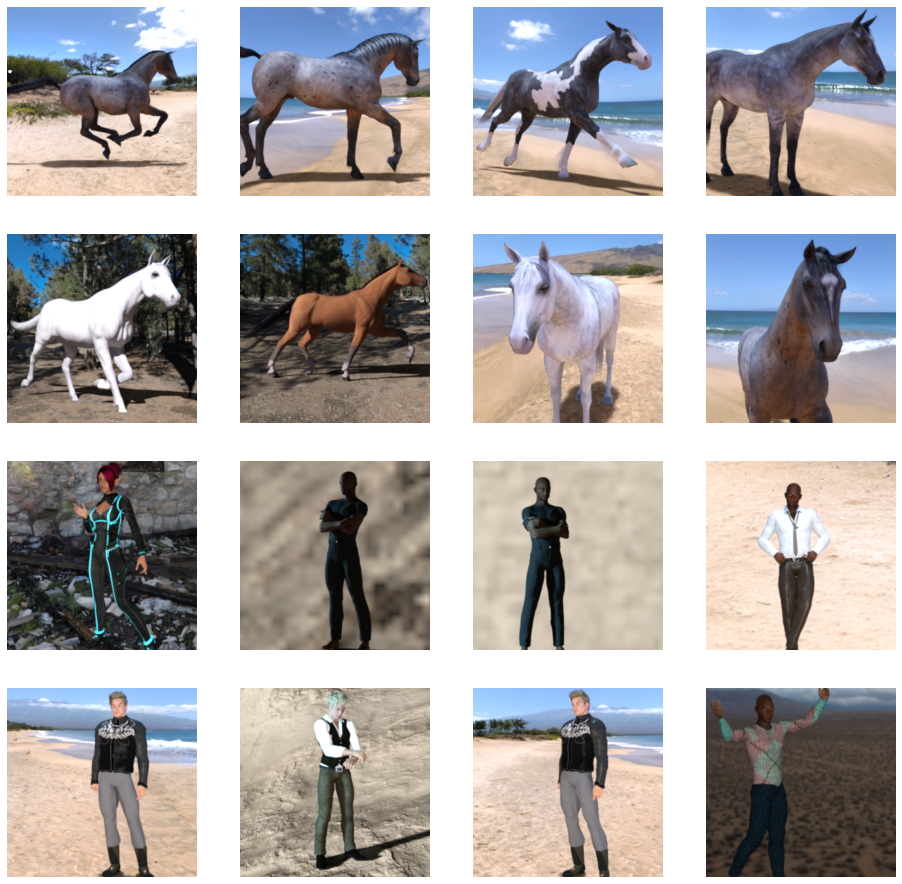

In [17]:
#set up fig & size 4x4 pics
fig= plt.gcf()
fig.set_size_inches(ncols* 4 , nrows* 4)

pic_index += 8
next_horse_pix= [os.path.join(train_horse_dir, fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix= [os.path.join(train_human_dir, fname)
                 for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp= plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img= mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [57]:
import tensorflow as tf
model =tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

In [59]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
                 loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescalse

train_datagen= ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')




Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [61]:
history= model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8)


Epoch 1/15
8/8 [==============================] - 78s 10s/step - loss: 0.7977 - accuracy: 0.5001 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 71s 9s/step - loss: 0.6385 - accuracy: 0.6409 - val_loss: 1.7922 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 71s 9s/step - loss: 0.6757 - accuracy: 0.6847 - val_loss: 0.4268 - val_accuracy: 0.8477
Epoch 4/15
8/8 [==============================] - 71s 9s/step - loss: 0.4476 - accuracy: 0.8336 - val_loss: 0.5295 - val_accuracy: 0.8320
Epoch 5/15
8/8 [==============================] - 71s 9s/step - loss: 0.2366 - accuracy: 0.9424 - val_loss: 0.6583 - val_accuracy: 0.8867
Epoch 6/15
8/8 [==============================] - 71s 9s/step - loss: 0.3721 - accuracy: 0.8532 - val_loss: 1.2185 - val_accuracy: 0.8398
Epoch 7/15
8/8 [==============================] - 71s 10s/step - loss: 0.1294 - accuracy: 0.9542 - val_loss: 1.3518 - val_accuracy: 0.8359
Epoch 8/15
8/8 [================